# AIsteroid
[http://bit.ly/aisteroid](http://bit.ly/aisteroid)

Este notebook esta destinado a mostrar algunas tareas básicas que pueden realizarse sobre un paquete de imágenes en los que se pueden buscar asteroides

In [1]:
#Aquí hay modulos y paquetes utiles para las tareas propias del análisis
from aisteroid import *

#Esto es para que Jupyter muestre las imágenes a medida que se van ejecutando los comandos
%matplotlib nbagg

In [2]:
#Ver los imagesets que están en el servidor
!make listimages NUM_SETS=20

Available image sets
	ps1-20180108_3_set104.zip
	ps1-20180107_1_set082.zip
	ps1-20180108_3_set179.zip
	ps1-20180108_3_set159.zip
	ps1-20180108_3_set155.zip
	ps1-20180108_3_set168.zip
	ps1-20180108_2_set189.zip
	ps1-20180108_3_set143.zip
	ps1-20180108_2_set165.zip
	ps1-20180108_3_set031.zip
	ps1-20180108_3_set005.zip
	ps1-20180107_1_set053.zip
	ps1-20180108_3_set056.zip
	ps1-20180108_3_set172.zip
	ps1-20180108_3_set046.zip
	ps1-20180107_1_set057.zip
	ps1-20170914_4_set106.zip
	ps1-20180108_3_set041.zip
	ps1-20180107_1_set000.zip
	ps1-20180108_3_set145.zip
	ps1-20180108_3_set004.zip
	ps1-20180108_3_set123.zip
	...
345 image sets available.


In [3]:
#Desempaca las imagenes: aquí usaremos uno de los scripts de AIsteroid
!python3.5 unpack.py "SET='example'"

************************************************************
UNPACKING SET 'example'
************************************************************
Unpacking images of set example
	Already unpacked.
	Done.
Images already read.
	Done.
Showing images in cascade
	Image '/home/jzuluaga/AIsteroid/scratch/example/plots/cascade-example.png' already generated.
	Done.
Detecting borders and image defects
Borders already detected.
	Done.
Showing borders and defects of images
	Image '/home/jzuluaga/AIsteroid/scratch/example/plots/borders-example.png' already generated.
	Done.
Blink images (all)
	Image '/home/jzuluaga/AIsteroid/scratch/example/plots//blinkall-example.gif' already generated.
	Done.
Blink images (sections)
	Image '/home/jzuluaga/AIsteroid/scratch/example/plots//blink-example.gif' already generated.
	Done.
Task completed.


In [4]:
#Ver las imágenes desempacadas
!ls scratch/example/*.fits

scratch/example/o8009g0075o.1299949.ch.1991737.XY51.p10.fits
scratch/example/o8009g0096o.1299970.ch.1991758.XY51.p10.fits
scratch/example/o8009g0117o.1299991.ch.1991779.XY51.p10.fits
scratch/example/o8009g0138o.1300012.ch.1991800.XY51.p10.fits


In [5]:
#Leer una de las imágenes
hd=fits.open("scratch/example/o8009g0075o.1299949.ch.1991737.XY51.p10.fits")

In [6]:
#Ver el contenido
hd.info()

Filename: scratch/example/o8009g0075o.1299949.ch.1991737.XY51.p10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  XY51.hdr      1 PrimaryHDU     621   (2423, 2434)   int16 (rescales to uint16)   


In [7]:
#Leer el encabezado
encabezado=hd[0].header

In [8]:
encabezado

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2423 / length of data axis 1                          
NAXIS2  =                 2434 / length of data axis 2                          
BZERO   =               32768. / Scaling: TRUE = BZERO + BSCALE * DISK          
BSCALE  =                   1. / Scaling: TRUE = BZERO + BSCALE * DISK          
DATE-OBS= '2017-09-13T07:34:37.398042' /  UTC start of exposure                 
TIMESYS = 'UTC     '           / Time scale                                     
EQUINOX =                2000. /                                                
EXPTIME =                  45. /  exposure time (sec)                           
OBJCTRA = '21 02 11.122'       / RA of center of the image                      
OBJCTDEC= '-15 34 59.964'   

In [9]:
#Se puede extraer el valor de una de las variables del encabezado
encabezado["DATE-OBS"]

'2017-09-13T07:34:37.398042'

In [10]:
#Extraer los datos de la imágen
imagen=hd[0].data

In [11]:
#Tamaño de la imágen
imagen.shape

(2434, 2423)

<IPython.core.display.Javascript object>


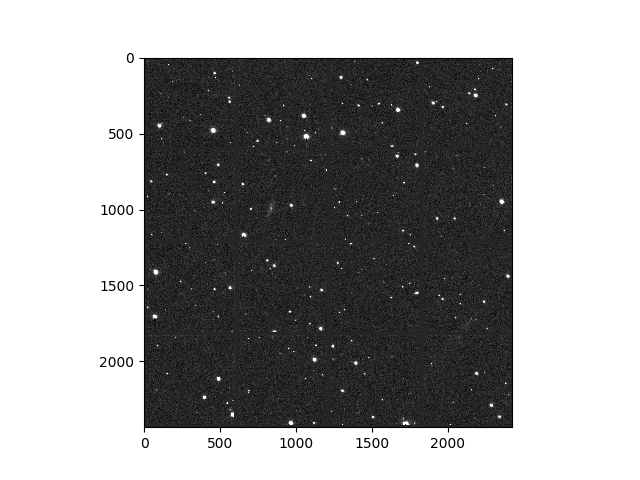

In [12]:
#Mostrar la imágen
fig,axs=plt.subplots(1,1)
axs.imshow(imagen,cmap='gray',vmin=100,vmax=500)

<IPython.core.display.Javascript object>


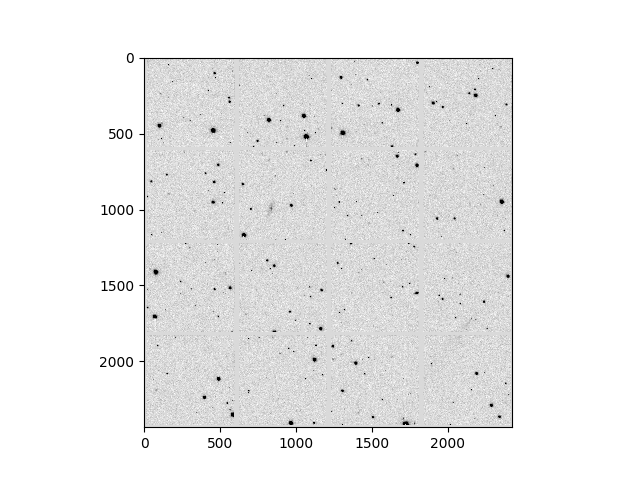

In [53]:
#Mostrar la imágen en negativo
fig,axs=plt.subplots(1,1)
axs.imshow(imagen,cmap='gray_r',vmin=100,vmax=500)

<IPython.core.display.Javascript object>


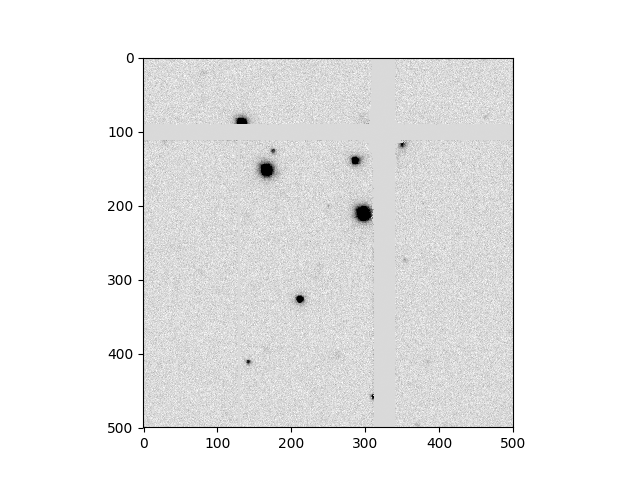

In [13]:
#Ver un pedazo de la imagen
fig,axs=plt.subplots(1,1)
axs.imshow(imagen[500:1000,1500:2000],cmap='gray_r',vmin=100,vmax=500)

In [15]:
#Cargar el archivo de configuración
CFG=[line.rstrip('\n') for line in open("data/sets/example.cfg")]

In [16]:
CFG

['[Settings]',
 'ApertureRadius=5',
 'ApertureGap=1',
 'SigmaLimit=4.0',
 'MinFWHM=1.20',
 'FitRMS=0.25',
 'SearchRadius=0.75',
 'Catalog=7',
 'MinMag=25.0',
 'MaxMag=13.0',
 'PosResidual=0.40',
 'MagResidual=0.70',
 'FitOrder=3',
 'NoMatch=100',
 'MatchRadius=2.00',
 'NoAlign=30',
 'AlignPixels=0',
 'SplitLine=1',
 'IncludeMag=1',
 'ExtraDigit=1',
 'ExtraDigitMag=0',
 'PixelWide=0.0100',
 'PixelHigh=0.0100',
 'Saturation=25000',
 'SkipCheck=1',
 'SaveWCS=0',
 'Color=R',
 'FocalLength=8070.0',
 'VarFocalLen=1.0',
 'PA=241.8',
 'VarPA=1.0',
 'Pointing=5.0',
 'FlipHoriz=0',
 'FlipVert=0',
 'TimeMode=0',
 'TimePrecision=0.10',
 'TimeOffset=0.00',
 'ExpTimeMode=1',
 'CheckAtStart=1',
 'AskOnClose=1',
 'Color0=255',
 'Color1=12632256',
 'Color2=16711680',
 'Color3=65280',
 'Color4=65535',
 'Color5=255',
 'Color6=16711935',
 'NoFilter=0',
 'Distortion=0.00',
 'BkGround=0',
 '[ObservingSite]',
 'MPCCode=F51',
 'Longitude=150.4170',
 'Latitude=20.7070',
 'Height=3066.0',
 'IncludeContact=0',
 

In [17]:
#Extraer una variable
Config(CFG,"MPCCode")

'F51'

In [18]:
#Extraer las fuentes de una imagen usando SEXtractor
output,header,data,nsources=SEXtract("scratch/example/",
                                     "o8009g0075o.1299949.ch.1991737.XY51.p10",
                                     DETECT_THRESH=10)

In [19]:
nsources

219

<IPython.core.display.Javascript object>


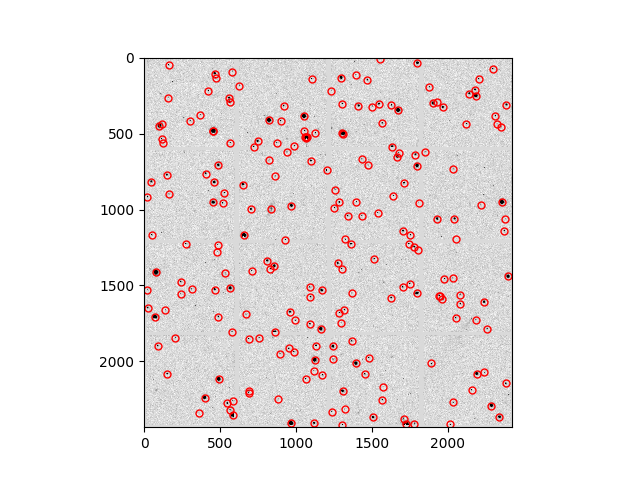

In [71]:
#Mostrar las fuentes superpuestas sobre la imagen
fig,axs=plt.subplots(1,1)

axs.imshow(imagen,cmap='gray_r',vmin=100,vmax=500)
axs.plot(data["X_IMAGE"]-1,data["Y_IMAGE"]-1,'ro',ms=5,mfc='None')

In [22]:
#Averiguar el campo de vision de la fotografía
ny,nx=imagen.shape

In [23]:
ny,nx

(2434, 2423)

In [24]:
#Propiedades del telescopio y la cámara

#Longitud focal en mm
foco=Config(CFG,"FocalLength")

#Ancho del pixel en mm
px=Config(CFG,"PixelWide")

#Alto del pixel en mm
py=Config(CFG,"PixelHigh")

#Tamaño promedio de los pixels
pm=(px+py)/2

In [25]:
#Calcula el campo de cada pixel en grados
campo_pixel=np.arctan(pm/foco)*RAD

In [26]:
campo_pixel

7.099848762460099e-05

In [27]:
#Campo del pixel en segundos de arco
campo_pixel/ARCSEC

0.25559455544856358

In [28]:
#Campo total de la foto
ancho_grados=nx*campo_pixel
alto_grados=ny*campo_pixel

In [29]:
ancho_grados,alto_grados

(0.17202933551440819, 0.1728103188782788)

In [45]:
#Obtener las coordenadas de la imagen
ra=encabezado["OBJCTRA"]
dec=encabezado["OBJCTDEC"]
ra,dec

('21 02 11.122', '-15 34 59.964')

In [31]:
#Descargar todas las estrellas que están en la misma zona de la imagen
columns=['_RAJ2000','_DEJ2000','R1mag']
v=Vizier(columns=columns)
v.ROW_LIMIT=-1

result=v.query_region("%s %s"%(ra,dec),
                      width=Angle(0.2,"deg"),height=Angle(0.2,"deg"),
                      catalog='USNOB1')

In [32]:
#Muestre los resultados
result

TableList with 1 tables:
	'0:I/284/out' with 3 column(s) and 503 row(s) 

In [33]:
#Extrae la primera tabla
result[0]

_RAJ2000,_DEJ2000,R1mag
deg,deg,mag
float64,float64,float32
315.445645,-15.505442,19.84
315.446925,-15.537734,19.04
315.447520,-15.573684,15.97
315.447973,-15.516156,18.38
315.449067,-15.555564,14.85
315.450675,-15.532753,--
315.452328,-15.567603,--
315.453089,-15.531931,17.64


In [34]:
#Convierte la tabla en un arreglo normal
estrellas=rec2arr(result[0])
estrellas.shape

(503, 3)

In [35]:
#Extrae solo las estrellas que tengan magnitud>0
condicion=estrellas[:,2]>0
aceptadas=estrellas[condicion]

In [36]:
aceptadas.shape

(366, 3)

<IPython.core.display.Javascript object>


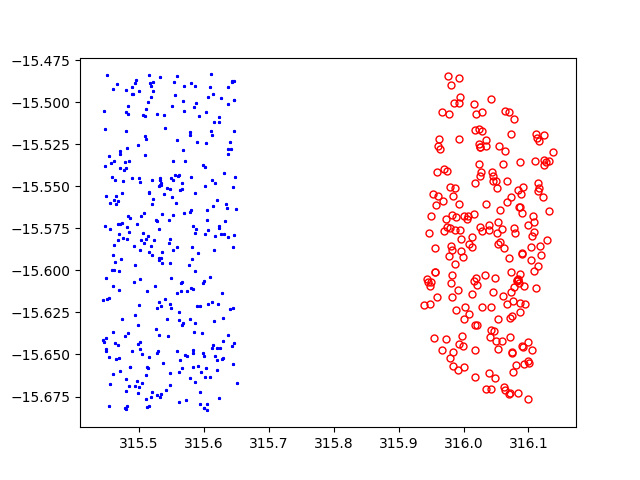

In [37]:
#Mostrar las fuentes superpuestas sobre la imagen
fig,axs=plt.subplots(1,1)

axs.plot(data["ALPHA_J2000"],data["DELTA_J2000"],'ro',ms=5,mfc='None')
axs.plot(aceptadas[:,0],aceptadas[:,1],'b*',ms=2)

In [39]:
#Obtener las estrellas pero cerca al centro del campo
ras=data["ALPHA_J2000"]
decs=data["DELTA_J2000"]

ra_mitad=ras.mean()
dec_mitad=decs.mean()

In [40]:
ra_mitad,dec_mitad

(316.03819518313674, -15.584543503251508)

In [46]:
#Convierte RA y DEC a formato sexagesimal
ra=dec2sex(ra_mitad/15,format="string")
dec=dec2sex(dec_mitad,format="string")
ra,dec
ra,dec=('21 04 9.17','-15 35 4.36')

In [47]:
result=v.query_region("%s %s"%(ra,dec),
                      width=Angle(0.2,"deg"),height=Angle(0.2,"deg"),
                      catalog='USNOB1')

In [49]:
estrellas=rec2arr(result[0])
aceptadas=estrellas[estrellas[:,2]>0]
aceptadas.shape

(352, 3)

<IPython.core.display.Javascript object>


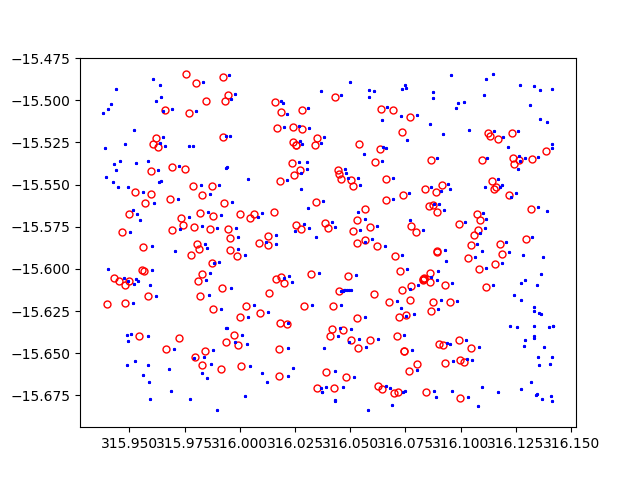

In [50]:
#Mostrar las fuentes superpuestas sobre la imagen
fig,axs=plt.subplots(1,1)

axs.plot(data["ALPHA_J2000"],data["DELTA_J2000"],'ro',ms=5,mfc='None')
axs.plot(aceptadas[:,0],aceptadas[:,1],'b*',ms=2)

In [58]:
#Para crear una version animada de la imagen es necesario leer todos los fits
imagenes=[]
for archivo in sorted(glob.glob("scratch/example/*.fits")):
    print(archivo)
    hd=fits.open(archivo)
    imagenes+=[hd[0].data]

scratch/example/o8009g0075o.1299949.ch.1991737.XY51.p10.fits
scratch/example/o8009g0096o.1299970.ch.1991758.XY51.p10.fits
scratch/example/o8009g0117o.1299991.ch.1991779.XY51.p10.fits
scratch/example/o8009g0138o.1300012.ch.1991800.XY51.p10.fits


<IPython.core.display.Javascript object>


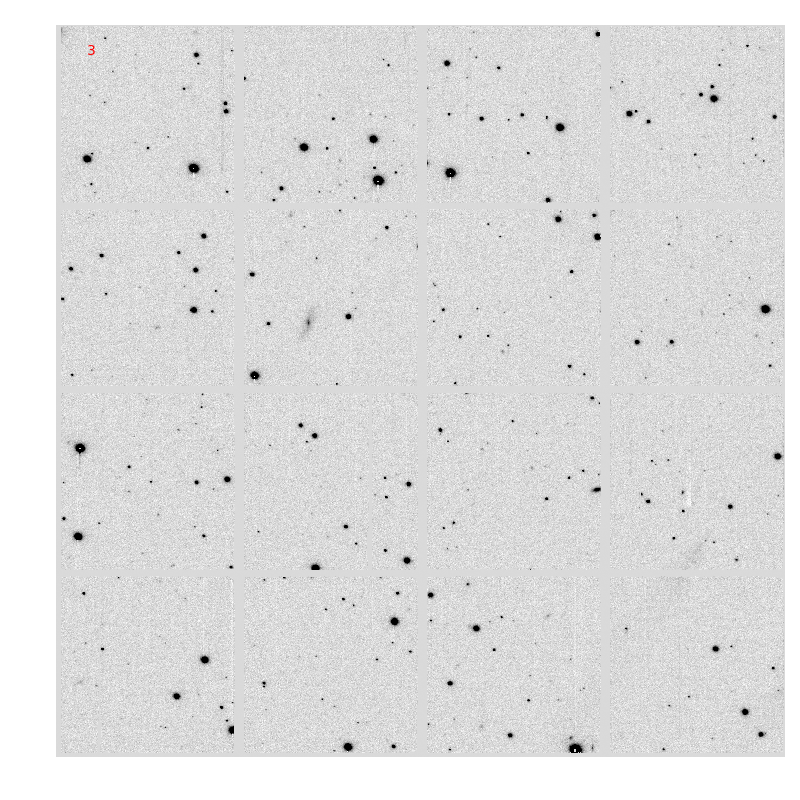

In [70]:
#Crear una versión animada de la imagen
fig,axs=plt.subplots(figsize=(8,8))

im=plt.imshow(imagenes[0],animated=True,cmap='gray_r',vmin=100,vmax=500)
tx=axs.text(100,100,"0",color='r')
axs.axis("off")
fig.tight_layout()

def updatefig(i):
    im.set_array(imagenes[i])
    tx.set_text("%d"%i)
    return im,

animation.FuncAnimation(fig,updatefig,frames=range(4),
                        interval=1000,repeat_delay=1000,
                        repeat=True,blit=True)

In [1]:
#Ver ejemplos en: http://astroweb.case.edu/jakub/TA/Query_databases.html
from astroquery.skyview import SkyView

In [2]:
img = SkyView.get_images(position='22:57:00,62:38:00',
                         survey=['DSS2 Red'],
                         pixels='800,800',
                         coordinates='J2000',grid=True,gridlabels=True)

In [ ]:
fig,axs=plt.subplots(1,1)
axs.imshow(img[0][0].data)